# **Modifed AlexNet**

### **Import Dependencies**

In [18]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### **Split Dataset** 

No need to run as the split folder is already contained in the repo

In [30]:
#import splitfolders

#splitfolders.ratio('./WeatherPhotos', output="Weather_Images", seed=1337, ratio=(0.6, 0.2, 0.2)) 

### **Create Datagens**

In [2]:
train_dir = "Weather_Images/train"
valid_dir = "Weather_Images/valid"
test_dir = "Weather_Images/test" 

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 64

In [5]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')
valid_set = train_datagen.flow_from_directory(valid_dir,
                                            target_size = IMAGE_SIZE,
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')                                                 
                                                 
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = IMAGE_SIZE,
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 674 images belonging to 4 classes.
Found 227 images belonging to 4 classes.
Found 222 images belonging to 4 classes.


### **Create, Compile and Fit AlexNet Model**

In [6]:
def AlexNetModel():
    model = Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
    ])
    return model

In [7]:
AlexNet = AlexNetModel()

AlexNet.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=1e-4), metrics=['accuracy'])

history = AlexNet.fit(
  training_set,
  validation_data=valid_set,
  steps_per_epoch = 10,
  validation_steps = 3,
  epochs=500)

Epoch 1/500
10/10 [==============================] - 5s 236ms/step - loss: 2.9607 - accuracy: 0.2344 - val_loss: 1.3881 - val_accuracy: 0.1927
Epoch 2/500
10/10 [==============================] - 2s 210ms/step - loss: 2.4523 - accuracy: 0.3115 - val_loss: 1.3907 - val_accuracy: 0.1146
Epoch 3/500
10/10 [==============================] - 2s 212ms/step - loss: 1.9661 - accuracy: 0.3875 - val_loss: 1.3922 - val_accuracy: 0.1927
Epoch 4/500
10/10 [==============================] - 2s 204ms/step - loss: 1.8174 - accuracy: 0.4246 - val_loss: 1.3916 - val_accuracy: 0.2344
Epoch 5/500
10/10 [==============================] - 2s 201ms/step - loss: 1.6946 - accuracy: 0.4656 - val_loss: 1.3947 - val_accuracy: 0.2188
Epoch 6/500
10/10 [==============================] - 2s 194ms/step - loss: 1.5310 - accuracy: 0.5000 - val_loss: 1.3986 - val_accuracy: 0.1875
Epoch 7/500
10/10 [==============================] - 2s 198ms/step - loss: 1.4340 - accuracy: 0.5197 - val_loss: 1.4010 - val_accuracy: 0.1979

In [69]:
AlexNet.evaluate(test_set)

4/4 [==============================] - 0s 60ms/step - loss: 0.1234 - accuracy: 0.9595


[0.123358815908432, 0.9594594836235046]

### **Graph the Training Data**

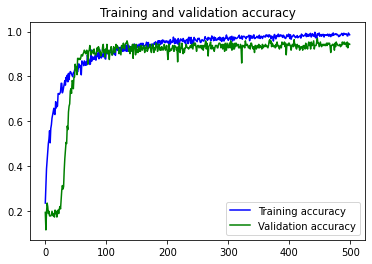

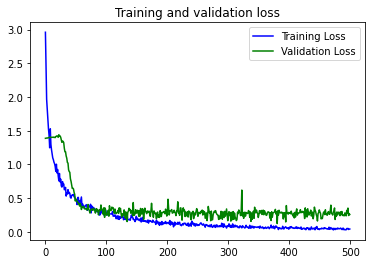

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### **Map the Labels and Predict on New Images Taken from Google Images**

In [10]:
labelNames = []

for f in os.listdir("./Weather_Images/test"):
    labelNames.append(f)

In [59]:
images = []

for imgName in os.listdir("testingImages"):
    img = image.load_img("testingImages/" + imgName, target_size=(224, 224, 3))
    img = image.img_to_array(img)/255.0
    preds = AlexNet.predict(img.reshape(1,224,224,3))
    MaxPosition=np.argmax(preds) 
    prediction_label=labelNames[MaxPosition]
    cv2.putText(img, prediction_label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, (0, 255, 0), 2)
    images.append(img)

1/1 [==============================] - 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


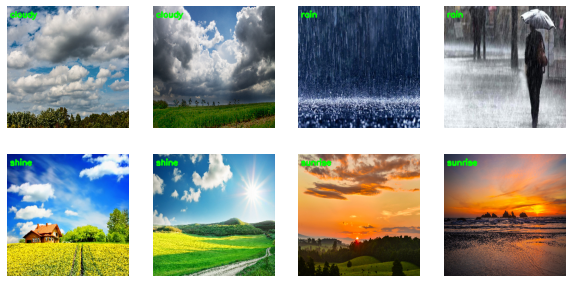

In [60]:
fig = plt.figure(figsize=(10,5))
for x in range(8):
    ax = fig.add_subplot(2,4,x+1)
    ax.axis('off')
    ax.imshow(images[x])
